## data pre processing

In [22]:
unknown_publishers = []    #svaing the indexes of records without any publisher like (WASHINGTON Reuters)
for index,row in enumerate(true_data.text.values):
    try:
        record = row.split(' - ',maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

In [23]:
len(unknown_publishers) # number of rows

229

##### here we want to remove the publisher from the text of the true data to make sure the model is mostly affected by how the text is written not only with the publisher 

In [24]:
publisher=[]    
tmptxt=[]
for index ,row in enumerate(true_data.text.values):   #returning row and index in each loop
    if index in unknown_publishers:
        tmptxt.append(row)     
        publisher.append("unknown")
    else:   
        record = row.split('-',maxsplit=1)   #splitting by "-" to split the text from the publishers
        publisher.append(record[0].strip())  #appending the publisher to publishers array
        tmptxt.append(record[1].strip())     # saving the text without the publisher

In [25]:
#true_data['publisher']=publisher
true_data['text']=tmptxt

In [26]:
true_data.head(20)

,title,text,subject,date,news status
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",True
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to k...,politicsNews,"December 29, 2017",True
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he bel...,politicsNews,"December 29, 2017",True
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",True
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",True
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said h...,politicsNews,"December 28, 2017",True


In [27]:
true_data['text'] = true_data['title']+ " " +true_data['text']      #merging title and text because we will work on one coloumn with the classififcation 
fake_data['text'] = fake_data['title']+ " " +fake_data['text']  

In [28]:
true_data['text'] = true_data['text'].apply(lambda x: str(x).lower())  #making all texts lowercase
fake_data['text'] = fake_data['text'].apply(lambda x: str(x).lower()) 

#### now it is time to merge the data

In [29]:
data = pd.concat([fake_data,true_data], axis=0)

In [30]:
data['news status'].unique() #checking the labels

array(['Fake', 'True'], dtype=object)

In [31]:
data['text']=data['title']+''+data['text']

##### in the following few cells our target will be to change the date which is written as a string in the data  to fixed form in order to make analysis on it

In [32]:
# extract the month
x='June 28, 2016'
re.split('\s',x,1)#[0]

['June', '28, 2016']

In [33]:
data['month']=data['date'].apply(lambda x:re.split('\s',x,1)[0])

In [34]:
# extract the day
x='June 28, 2016'
re.search('\d{2}',x).group()

'28'

In [35]:
# df['day']=df['date'].apply(lambda x:re.search('\d{2}',x).group())
# it does not work because some dates do not have a day
def _day_(x):
    try:
        value=re.search('\d{2}',x).group()
    except:
        value= data['day']=np.nan
    return value
data['day']=data['date'].apply(_day_)

In [36]:
# extract the year
x='June 28, 2016'
re.search('\d{4}',x).group()

'2016'

In [37]:
#df['year']=df['date'].apply(lambda x:re.search('\d{4}',x).group())
#it does not work because some dates do not have a year
def _year_(x):
    try:
        value=re.search('\d{4}',x).group()
    except:
        value= data['year']=np.nan
    return value
data['year']=data['date'].apply(_year_)

In [38]:
# number of null values in each column
data.isnull().sum()

title           0
text            0
subject         0
date            0
news status     0
month           0
day             1
year           39
dtype: int64

In [39]:
data.dropna(inplace=True) #dropping nulls 

In [40]:
data.month.unique() #checking what values we have in month after the splitting

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January', 'Dec',
       'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'Apr', 'Mar', 'Feb',
       'Jan',
       'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
       'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg'],
      dtype=object)

##### we found unexpected value for month,lets deal with it

In [41]:
data[data['month']=='https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg']

,title,text,subject,date,news status,month,day,year
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,https://fedup.wpengine.com/wp-content/uploads/...,20,2015


In [42]:
# drop rows 
data.drop([15839,17432,21869],axis=0,inplace=True)

In [43]:
data[data['month']=='https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg']

,title,text,subject,date,news status,month,day,year
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,https://fedup.wpengine.com/wp-content/uploads/...,20,2015


In [44]:
# drop rows 
data.drop([15840,17433,21870],axis=0,inplace=True)

##### now lets check again

In [45]:
data.month.unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January', 'Dec',
       'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'Apr', 'Mar', 'Feb',
       'Jan'], dtype=object)

##### all good lets move on

In [46]:
mon = {'January':'01',    #changing the months from letters to their corresponding nums
        'February':'02',
        'March':'03',
        'April':'04',
        'May':'05',
        'June':'06',
        'July':'07',
        'August':'08',
        'September':'09',
        'October':'10',
        'November':'11',
        'December':'12',
        'Jan':'01',
        'Feb':'02',
        'Mar':'03',
        'Apr':'04',
        'Jun':'06',
        'Jul':'07',
        'Aug':'08',
        'Sep':'09',
        'Oct':'10',
        'Nov':'11',
        'Dec':'12'}
data['month']=data['month'].map(mon)

In [47]:
data.month.unique()

array(['12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02',
       '01'], dtype=object)

In [48]:
# now create a new date column clearly
data['new_date']=data['year']+'-'+data['month']+'-'+data['day']

In [49]:
data.head()

,title,text,subject,date,news status,month,day,year,new_date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",Fake,12,31,2017,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",Fake,12,31,2017,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",Fake,12,30,2017,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",Fake,12,29,2017,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",Fake,12,25,2017,2017-12-25


In [50]:
# now I can convert to date time
data['new_date']=pd.to_datetime(data['new_date'])

In [51]:
# drop columns 'date','day','month','year'
data.drop(columns=['date','day','month','year'],inplace=True)

##### now the news data is ready to be plotted over the months

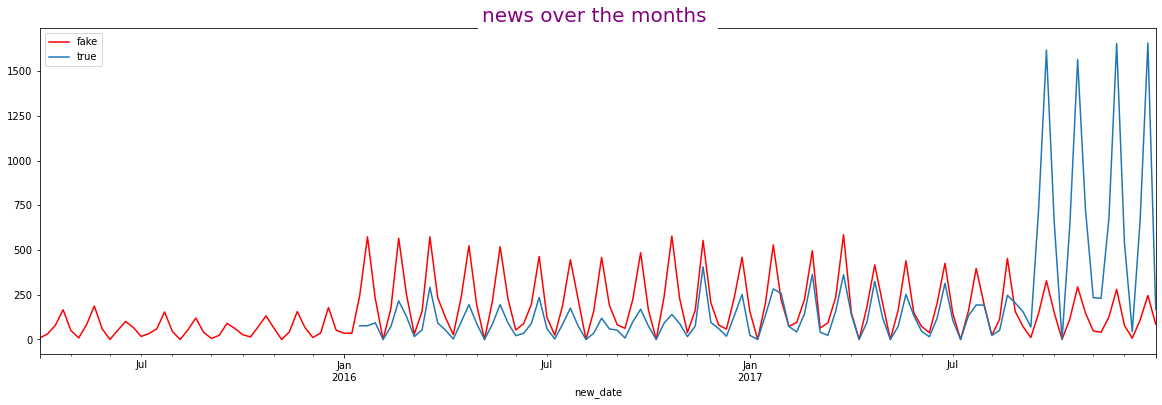

In [54]:
plt.figure(figsize=(20,6))
data[data['news status']=='Fake'].groupby([pd.Grouper(key='new_date', freq='W')])['news status'].count().plot(kind='line',label='fake',c='red')
data[data['news status']=='True'].groupby([pd.Grouper(key='new_date', freq='W')])['news status'].count().plot(kind='line',label='true')
plt.title("news over the months ",
          fontsize='20',
          backgroundcolor='white',
          color='Purple')
plt.legend();

##### in the previous plot we are able to see that the graph is continious because we nearly have a news in every day from this giving interval

In [55]:
data.head()

,title,text,subject,news status,new_date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,Fake,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,Fake,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,Fake,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,Fake,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,Fake,2017-12-25


In [56]:
data=shuffle(data)

In [57]:
data.head()

,title,text,subject,news status,new_date
16844,Iraq increases oil exports from south to make ...,Iraq increases oil exports from south to make ...,worldnews,True,2017-10-21
16021,"Turkey, Iran agree to discuss Russia's Syrian ...","Turkey, Iran agree to discuss Russia's Syrian ...",worldnews,True,2017-10-31
21375,GERMAN VOLUNTEERS HOLD WELCOME RALLY: Applaud ...,GERMAN VOLUNTEERS HOLD WELCOME RALLY: Applaud ...,left-news,Fake,2015-10-31
14783,Indian police arrest suspected cow vigilantes ...,Indian police arrest suspected cow vigilantes ...,worldnews,True,2017-11-15
18665,‘Who Appointed You to the Supreme Court?’: Sen...,‘Who Appointed You to the Supreme Court?’: Sen...,left-news,Fake,2017-05-20


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44849 entries, 16844 to 3505
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        44849 non-null  object        
 1   text         44849 non-null  object        
 2   subject      44849 non-null  object        
 3   news status  44849 non-null  object        
 4   new_date     44849 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 2.1+ MB


In [59]:
data.isnull().sum()

title          0
text           0
subject        0
news status    0
new_date       0
dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X = data['text']  
y = data['news status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
y_train.value_counts()

Fake    15670
True    14378
Name: news status, dtype: int64

In [62]:
y_test.value_counts()

Fake    7766
True    7035
Name: news status, dtype: int64

### TEXT PREPROCESSING (NLP) 
#### by making vactorization for the text in order to convert the text into numerical vectors which the model can deal with

In [63]:
from sklearn.feature_extraction.text import CountVectorizer   
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(30048, 117294)

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(30048, 117294)

In [65]:
pd.DataFrame(X_train_tfidf)[0]

0          (0, 116195)\t0.08212109340840058\n  (0, 1159...
1          (0, 116222)\t0.022340785210868973\n  (0, 116...
2          (0, 115818)\t0.017018049511222304\n  (0, 114...
3          (0, 116158)\t0.027718410034773204\n  (0, 115...
4          (0, 116195)\t0.03870942618670194\n  (0, 1143...
                               ...                        
30043      (0, 116195)\t0.037397897189716756\n  (0, 115...
30044      (0, 114730)\t0.058606418415752315\n  (0, 112...
30045      (0, 116195)\t0.1037092080589884\n  (0, 11581...
30046      (0, 116777)\t0.053002344692350725\n  (0, 116...
30047      (0, 116195)\t0.06620536002713795\n  (0, 1149...
Name: 0, Length: 30048, dtype: object

##### using tfidf to make analysis characterstics of the text 

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(30048, 117294)